## Polynomial Regression
Polynomial Regression is a type of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as an $n$ th-degree polynomial. It is an extension of linear regression, but capturing **non-linear** relationships between $x$ and $y$.

The degree of the polynomial equation determines the level of complexity in the relationship, but rarely higher degrees are being used (2nd degree is most common).

### Advantages
* **Captures Nonlinearities**: Polynomial regression is perfect when you know your data has some curvature. It picks up on those patterns that linear regression simply can’t.

* **Flexibility**: The more degrees of polynomial you add, the more flexible your model becomes. It can handle almost any shape.

* **Multiple Variables**: With multiple variables, polynomial regression allows you to model not just the relationships between the variables and the outcome but also the interactions between the variables themselves.


### Disdvantages
* **Overfitting**: More flexibility isn’t always better. You might end up with a model that fits your training data like a glove but fails miserably on new data. It’s like using a magnifying glass to find every tiny detail when a broader view would’ve done the job.

* **Complexity**: Polynomial regression models can become complex and hard to interpret as you increase the degree of the polynomial or the number of variables. At some point, it starts to feel like more art than science.

* **Computational Cost**: Higher degrees of polynomials and multiple variables can increase the computational complexity. You may need to be careful about how much flexibility you introduce, especially if you’re working with large datasets.

## Equation
The general form of a Polynomial Regression equation is:
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + ... + \beta_n x_1^n $$

where $y$ is the dependent variable, $x$ is the independent variable and $\beta_0$, $\beta_1$, $\beta_2$, ..., $\beta_n$ are the coefficients of the polynomial equation, $n$ is the degree of the polynomial equation.

The goal is to find the values of these coefficients that provide the best fit to the observed data. The resulting polynomial equation can then be used to make predictions for new values of $x$.

### Equation of second degree

The equation of second degree and two features would look like this:
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2+ \beta_3 x_1 x_2  + \beta_4 x_1^2 + \beta_5 x_2^2 $$

## Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Transform vector to polynomial
Firstly, we'll need a method to transform $x_1, x_2$ into a vector of all powered feature values.

$$ (x_1, x_2) => (1, x_1, x_2,x_1 x_2, x_1^2, x_2^2)$$

In [2]:
def transform_to_2nd_degree_polynomial(x: np.ndarray) -> np.ndarray:
    '''
    Transforms the input vector of feature values (x_1, x_2, ..., x_n) to a polynomial vector of degree 2.

    Args:
        x           : np.ndarray of shape (n, 1), where n is the number of features

    Returns:
        [1, x_1, x_2, ..., x_n, x_1*x_2, x_1*x_3, ..., x_n-1*x_n, x_1^2, x_2^2, ..., x_n^2]
    '''
    n = x.shape[0] # Number of features
    # STEP 1: We start with 1, because the polynomial always has 1 as the first term
    terms = [1]
    # STEP 2: Now we add all the first degree terms (x_i)
    for i in range(n):
        terms.append(x[i])
    # STEP 3: Now we add all the combinations of the first degree terms (x_i * x_j).
    for i in range(n):
        for j in range(i+1, n): # We start from i+1 to avoid duplicates
            terms.append(x[i] * x[j])
    # STEP 4: Now we add all the second degree terms (x_i^2)
    for i in range(n):
        terms.append(x[i]**2)
    return terms

X = np.array([[2, 5], [3, 11]])
for x in X:
    X_poly = transform_to_2nd_degree_polynomial(x)
    print(X_poly)

[1, np.int64(2), np.int64(5), np.int64(10), np.int64(4), np.int64(25)]
[1, np.int64(3), np.int64(11), np.int64(33), np.int64(9), np.int64(121)]


### 2. Transform dataset to polynomials
Now, let's upgrade the transformation abstraction to support not single observations, but a whole dataset.

In [3]:
def transform_to_2nd_degree_matrix(X: np.ndarray) -> np.ndarray:
    output_matrix = []
    for x in X:
        X_poly = transform_to_2nd_degree_polynomial(x)
        output_matrix.append(X_poly)
    return np.array(output_matrix)

X = np.array([[2, 5], [3, 11]])
transform_to_2nd_degree_matrix(X)

array([[  1,   2,   5,  10,   4,  25],
       [  1,   3,  11,  33,   9, 121]])

### 3. Initialize weights
Now, we need to initialize the weights. For simplicity we could just fill it with random numbers.

In [4]:
def initialize_weights(num_features: int):
    '''
    Initializes the weights of the polynomial regression model. The number of weights depend on 
    the number of features and the degree of the polynomial.

    Args:
        num_features        : int - number of features

    Returns:
        weights             : np.ndarray - weights of the polynomial regression model
    '''
    poly_sizes = {
        1: 3,
        2: 6,
        3: 10,
        4: 15,
        5: 21,
        6: 28 # The formula is [1 + num_features + num_features + (num_features choose 2)]
    }
    # Determine the number of weights based on the number of features.
    weight_size = poly_sizes[num_features]
    # Initialize the weights with random values.
    weights = np.random.randn(weight_size)
    return weights

initialize_weights(2)

array([ 1.15424125,  1.60039539,  0.77795076,  1.3671054 , -0.84867946,
        1.04192856])

### 4. Gradient descent
The **Polynomial regression** can identify the optimal coefficients using two different methods: the **normal equation** and **gradient descent**. In current notebook, we'll implement the **gradient descent** approach.

In [5]:

def train_iteration(X: np.ndarray, Y: np.ndarray, learn_rate: float, weights: np.ndarray):
    '''
    Trains the polynomial regression model for a single iteration using the gradient descent algorithm.
    '''
    # Transform the flat observations matrix to a polynomial matrix
    X_poly = transform_to_2nd_degree_matrix(X) # (m, 6)
    # Calculate the predicted values
    Y_pred = np.dot(X_poly, weights) # (m,6) @ (6,1) = (m, 1)
    # Calculate the error
    error = Y_pred - Y # (m, 1) - (m, 1) = (m, 1)
    # Update the weights
    weights -= learn_rate * (X_poly.T @ error) # (6,m) @ (m,1) = (6,1)
    # Return the updated weights
    return weights, np.sum(error**2)/X.shape[0]
    
def train(X: np.ndarray, Y: np.ndarray, learn_rate: float, epochs: int):
    '''
    Trains the polynomial regression model.
    '''
    num_features = X.shape[1] # Number of features
    weights = initialize_weights(num_features)
    losses = []
    for _ in range(epochs):
        weights, loss = train_iteration(X, Y, learn_rate, weights)
        losses.append(loss)
        if _ % 100 == 0:
            print(f"Iteration {_} - Loss: {loss}")
    return weights, losses

### 5. Demo
Let's execute a demo. Again - with the sample data for monthly salaries in the ML industry.

Iteration 0 - Loss: 19645.009713669326
Iteration 100 - Loss: 6.813209853339283
Iteration 200 - Loss: 2.1406051585898664
Iteration 300 - Loss: 1.727202796159245
Iteration 400 - Loss: 1.5849448836467448

Final weights:
	b_0    : -0.94
	x_1    : 0.98
	x_2    : 0.49
	x_1*x_2: -0.26
	x_1^2  : 0.06
	x_2^2  : 0.16


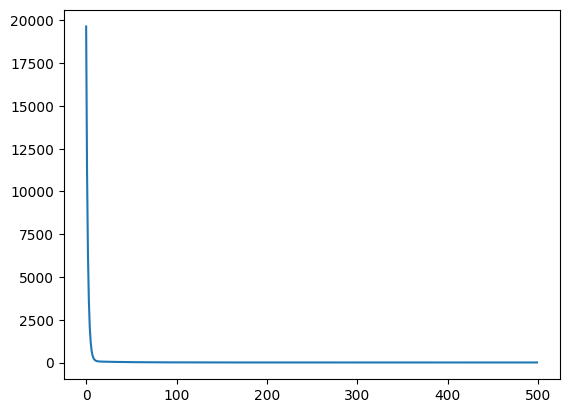

In [6]:
# X1 = years of experience
X1 = [1.2, 1.3, 1.5, 1.8, 2, 2.1, 2.2, 2.5, 2.8, 2.9, 3.1, 3.3, 3.5, 3.8, 4, 4.1, 4.5, 4.9, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 10, 11, 12, 13, 14, 15]
# X2 = level of education 
X2 = [2, 5, 3, 5, 3, 4, 2, 3, 4, 4, 3, 7, 5, 6, 5, 5, 2, 3, 4, 5, 6, 7, 5, 3, 2, 4, 5, 7, 3, 5, 7, 7, 5]
# Y = salary
Y = [2900, 3300, 3100, 4200, 3500, 3800, 3300, 3500, 3750, 4000, 3900, 5300, 4420, 5000, 4900, 5200, 3900, 4800, 5700, 6500, 6930, 7500, 7360, 6970, 6800, 7500, 8000, 9500, 11000, 9500, 12300, 13700, 12500]
Y = np.array(Y) / 1000 # Normalize the Y values, so we prevent overflows

# Merge the X1 and X2 into a single X
X = [[x1, x2] for x1, x2 in zip(X1, X2)]

# Convert the X, Y to a numpy arrays
X = np.array(X)
Y = np.array(Y)

# Configure gradient descent settings
learn_rate = 0.000001   # learning rate (step size)
iterations = 500   # number of iterations (epochs)

weights, losses = train(X, Y, learn_rate, iterations)

print(f"\nFinal weights:")
print(f"\tb_0    : {weights[0]:.2f}")
print(f"\tx_1    : {weights[1]:.2f}")
print(f"\tx_2    : {weights[2]:.2f}")
print(f"\tx_1*x_2: {weights[3]:.2f}")
print(f"\tx_1^2  : {weights[4]:.2f}")
print(f"\tx_2^2  : {weights[5]:.2f}")

# Plot the loss function
epochs = np.arange(iterations)
plt.plot(epochs, losses)
plt.show()

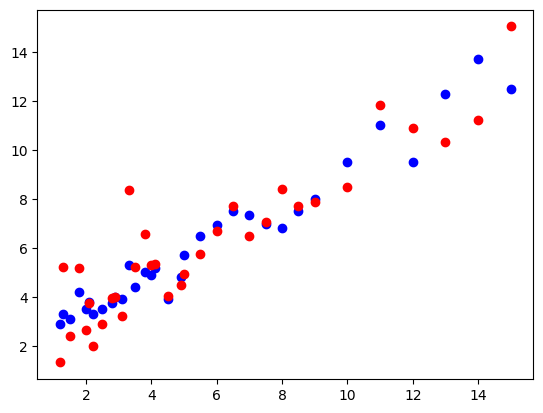

In [7]:
# Let's plot the X1 and Y data
plt.scatter(X1, Y, color="blue")
# Let's plot the predicted values
X_poly = transform_to_2nd_degree_matrix(X)
Y_pred = np.dot(X_poly, weights)
plt.scatter(X1, Y_pred, color="red")
plt.show()

## References
* [Polynomial Regression in Multiple Variables](https://medium.com/@heyamit10/polynomial-regression-in-multiple-variables-74a6dda16b92)